# 6. Features extraction of image - 영상의 특징 추출

## 1) Differential of image and Sobel filter - 영상의 미분과 소벨 필터

<hr>



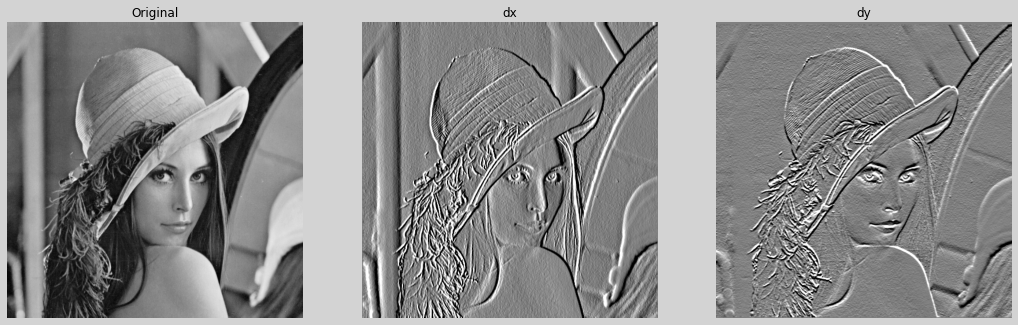

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# 3x3 소벨 미분 마스크를 직접 구현해서 적용
# kernel = np.array([
#     [-1, 0, 1],
#     [-2, 0, 2],
#     [-1, 0, 1]], dtype=np.float32)
# dx = cv2.filter2D(source, -1, kernel, delta=128)

dx = cv2.Sobel(source, -1, 1, 0, delta=128)  # x 방향
dy = cv2.Sobel(source, -1, 0, 1, delta=128)  # y 방향

# pyplot으로 출력
plt.figure(figsize=(18, 6), facecolor="lightgray")

plt.subplot(131, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(132, title="dx").axis("off")
plt.imshow(dx, "gray")

plt.subplot(133, title="dy").axis("off")
plt.imshow(dy, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("dx", dx)
cv2.imshow("dy", dy)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

## 2) Gradient and edge detection - 기울기와 가장자리 검출

<hr>



In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(source, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(source, cv2.CV_32F, 0, 1)

magnitude = cv2.magnitude(dx, dy)
magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)

phase = cv2.phase(dx, dy, angleInDegrees=True)
phase = np.clip(phase, 0, 255).astype(np.uint8)

edge = np.zeros(magnitude.shape[:2], np.uint8)
edge[magnitude > 80] = 255

cv2.imshow("Original", source)
cv2.imshow("Magnitude", magnitude)
cv2.imshow("Phase", phase)
cv2.imshow("edge", edge)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 3) Canny edge detection - 캐니 에지 검출

<hr>



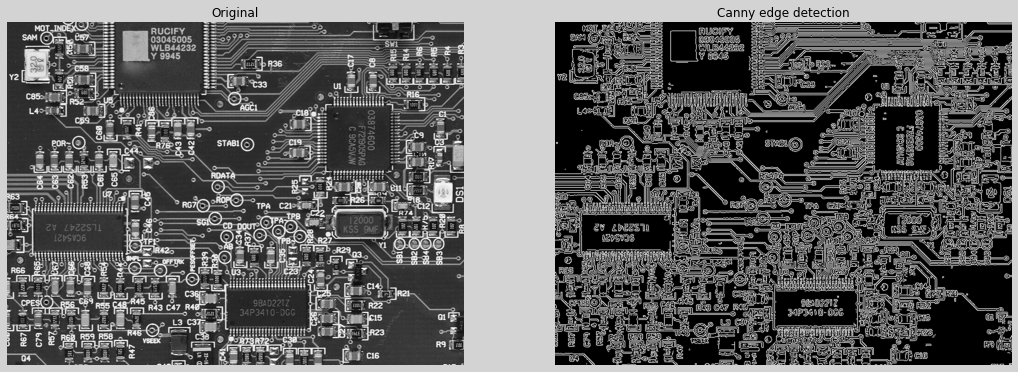

-1

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# source = cv2.imread("images/building.jpg", cv2.IMREAD_GRAYSCALE)
source = cv2.imread("images/circuit2.bmp", cv2.IMREAD_GRAYSCALE)

dx = cv2.Sobel(source, cv2.CV_32F, 1, 0)
dy = cv2.Sobel(source, cv2.CV_32F, 0, 1)

canny = cv2.Canny(source, 50, 150, L2gradient=True)
canny = cv2.resize(canny, (0, 0), fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

# pyplot으로 출력
plt.figure(figsize=(18, 12), facecolor="lightgray")

plt.subplot(121, title="Original").axis("off")
plt.imshow(source, "gray")

plt.subplot(122, title="Canny edge detection").axis("off")
plt.imshow(canny, "gray")

plt.show()

# OpenCV 가상 윈도우로 출력
cv2.imshow("Original", source)
cv2.imshow("Canny edge detection", canny)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)